## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter 
import warnings
warnings.filterwarnings("ignore")

In [23]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=0)

### Data Wrangling
Take info

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [25]:
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [26]:
data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


<AxesSubplot:xlabel='Recommended IND', ylabel='count'>

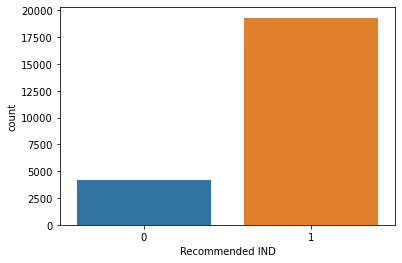

In [27]:
sns.countplot(data['Recommended IND'])

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [28]:
df = data[['Review Text', 'Recommended IND']]

In [29]:
df = df.rename(columns = {'Review Text' : 'Review', 'Recommended IND':'Recommended'})
df

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


### Missing Value Detection

In [30]:
df.loc[(df.Review.isna()==True) & (df.Recommended ==0)]

,Review,Recommended
165,NaN,0
523,NaN,0
574,NaN,0
580,NaN,0
1046,NaN,0
...,...,...
20773,NaN,0
22017,NaN,0
22230,NaN,0
22492,NaN,0


In [31]:
df.loc[(df.Review.isna()==True) & (df.Recommended ==1)]

,Review,Recommended
92,NaN,1
93,NaN,1
98,NaN,1
135,NaN,1
142,NaN,1
...,...,...
23258,NaN,1
23301,NaN,1
23303,NaN,1
23470,NaN,1


In [32]:
df.Review.shape

(23486,)

In [33]:
df.Review.fillna(' ',inplace =True)

In [34]:
df.loc[(df.Review.isna()==False)]

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


---
---


## 3. Text Mining




### Tokenization

In [35]:
def cleaning(data):
    stop_words = stopwords.words('english')
    lem = WordNetLemmatizer()
    #1 . Tokenize
    text_tokens = word_tokenize(data)
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #4. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    #join
    return ' '.join(text_cleaned)

In [36]:
df.head()

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1



### Noise Removal

In [53]:
def count(df,col):
    stop_words = stopwords.words('english')
    lem = WordNetLemmatizer()
    token = df[col].apply(lambda x : word_tokenize(x))
    token_alpha = [j for i in token for j in i if j.isalpha()]
    corpus = [i for i in token_alpha if i not in stop_words]
    corpus_2 = [lem.lemmatize(t) for t in corpus]
    return corpus_2

In [54]:
def corpus(df,col):
    stop_words = stopwords.words('english')
    lem = WordNetLemmatizer()
    token = df[col].apply(lambda x : word_tokenize(x))
    token_alpha = [j for i in token for j in i if j.isalpha()]
    corpus = [i for i in token_alpha if i not in stop_words]
    corpus_2 = [lem.lemmatize(t) for t in corpus]
    return ' '.join(corpus_2)

In [39]:
token = df.Review.apply(lambda x : word_tokenize(x))
token

0        [Absolutely, wonderful, -, silky, and, sexy, a...
1        [Love, this, dress, !, it, 's, sooo, pretty, ....
2        [I, had, such, high, hopes, for, this, dress, ...
3        [I, love, ,, love, ,, love, this, jumpsuit, .,...
4        [This, shirt, is, very, flattering, to, all, d...
                               ...                        
23481    [I, was, very, happy, to, snag, this, dress, a...
23482    [It, reminds, me, of, maternity, clothes, ., s...
23483    [This, fit, well, ,, but, the, top, was, very,...
23484    [I, bought, this, dress, for, a, wedding, i, h...
23485    [This, dress, in, a, lovely, platinum, is, fem...
Name: Review, Length: 23486, dtype: object

In [40]:
token_alpha = [j for i in token for j in i if j.isalpha()]
token_alpha[:15]

['Absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comfortable',
 'Love',
 'this',
 'dress',
 'it',
 'sooo',
 'pretty',
 'i',
 'happened']

In [41]:
stop_words = stopwords.words('english')

In [42]:
corpus = [i for i in token_alpha if i not in stop_words]

### Lexicon Normalization

In [43]:
lem = WordNetLemmatizer()

In [44]:
corpus_2 = [lem.lemmatize(t) for t in corpus]
corpus[:10]

['Absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'Love',
 'dress',
 'sooo',
 'pretty',
 'happened']

In [45]:
df.Review = df.Review.apply(cleaning)

In [46]:
df.Review.shape

(23486,)

---
---


## 4. WordCloud - Repetition of Words


### Detect Reviews (positive and negative separately)

In [47]:
print(Counter(corpus_2).most_common(10))

[('dress', 11318), ('fit', 10059), ('I', 9386), ('size', 9354), ('top', 8270), ('love', 7907), ('like', 6963), ('color', 6897), ('look', 6855), ('wear', 6519)]


In [48]:
positive = df[df.Recommended== 1].iloc[:,0]
up = pd.DataFrame({'positive_review': positive})
up.head()

,positive_review
0,Absolutely wonderful silky sexy comfortable
1,Love dress sooo pretty happened find store gla...
3,I love love love jumpsuit fun flirty fabulous ...
4,This shirt flattering due adjustable front tie...
6,I aded basket hte last mintue see would look l...


In [49]:
negative = df[df.Recommended== 0].iloc[:,0]
down = pd.DataFrame({'negative_review':negative})
down.head()

,negative_review
2,I high hope dress really wanted work initially...
5,I love tracy reese dress one petite foot tall ...
10,Dress run small esp zipper area run ordered sp...
22,First pullover styling side zipper would purch...
25,Loved material didnt really look long dress pu...


### Collect Words (positive and negative separately)

In [55]:
plus=corpus(up,'positive_review')

In [56]:
minus=corpus(down,'negative_review')

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [57]:
Counter(count(up,'positive_review')).most_common(10)

[('dress', 9225),
 ('fit', 8574),
 ('size', 8011),
 ('I', 7486),
 ('love', 7014),
 ('top', 6575),
 ('color', 5888),
 ('wear', 5739),
 ('look', 5289),
 ('great', 5260)]

In [58]:
Counter(count(down,'negative_review')).most_common(10)

[('dress', 2093),
 ('I', 1900),
 ('like', 1728),
 ('top', 1695),
 ('look', 1566),
 ('fit', 1485),
 ('would', 1448),
 ('size', 1343),
 ('fabric', 1262),
 ('back', 1026)]

In [59]:
#!pip install wordcloud

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

POSITIVE

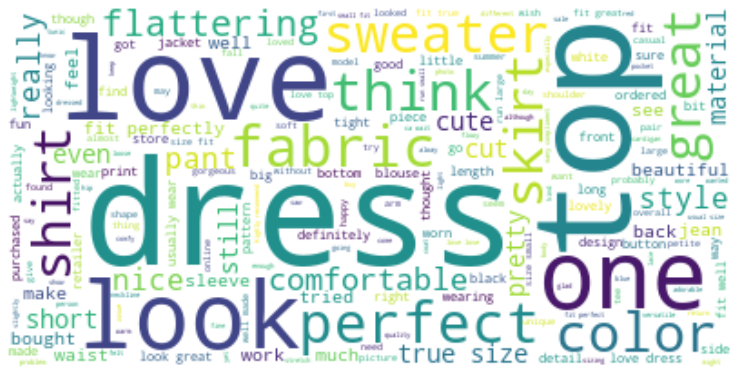

In [61]:
wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate(plus)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NEGATIVE

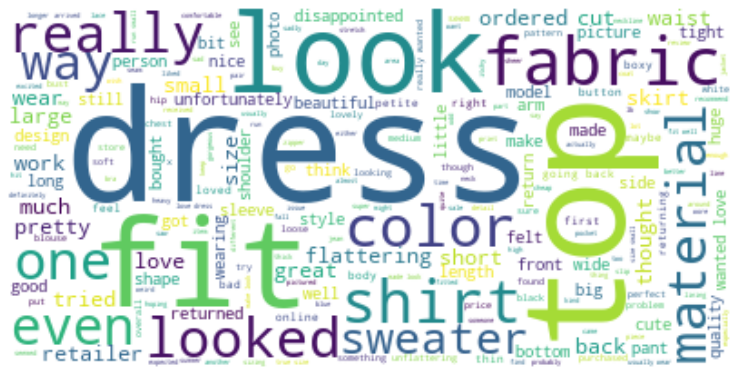

In [62]:
wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate(minus)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.Review, df.Recommended, test_size=0.33, random_state=42)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
vec = CountVectorizer()

In [67]:
vec.fit(X_train)

CountVectorizer()

In [68]:
X_train_count = vec.transform(X_train)
X_test_count = vec.transform(X_test)

In [69]:
vec.get_feature_names()[0:5]

['aa', 'aaaaannnnnnd', 'aame', 'ab', 'abbey']

In [70]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### TF-IDF

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tf_idf = TfidfVectorizer()

In [73]:
tf_idf.fit(X_train)

TfidfVectorizer()

In [74]:
X_train_tfidf = tf_idf.transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

In [75]:
tf_idf.get_feature_names()[:5]

['aa', 'aaaaannnnnnd', 'aame', 'ab', 'abbey']

In [76]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Logistic Regression

COUNT

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
log = LogisticRegression()

In [80]:
model = log.fit(X_train_count, y_train)

In [81]:
y_pred = model.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 778  610]
 [ 285 6078]]
              precision    recall  f1-score   support

           0       0.73      0.56      0.63      1388
           1       0.91      0.96      0.93      6363

    accuracy                           0.88      7751
   macro avg       0.82      0.76      0.78      7751
weighted avg       0.88      0.88      0.88      7751



In [82]:
from sklearn.model_selection import cross_val_score

In [201]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

ACCURACY F1 SCORE

In [84]:

logreg_count_accuracy = accuracy_score(y_test, y_pred)
logreg_counct_f1_score = f1_score(y_test,y_pred)
print('Count Vectors Accuracy: ',logreg_count_accuracy)
print('Count Vectors f1_score: ',logreg_counct_f1_score)

Count Vectors Accuracy:  0.8845310282544188
Count Vectors f1_score:  0.9314228794728373


TFIDF

In [85]:
log = LogisticRegression()
model = log.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 641  747]
 [ 160 6203]]
              precision    recall  f1-score   support

           0       0.80      0.46      0.59      1388
           1       0.89      0.97      0.93      6363

    accuracy                           0.88      7751
   macro avg       0.85      0.72      0.76      7751
weighted avg       0.88      0.88      0.87      7751



ACCURACY F1 SCORE

In [86]:
logreg_tfidf_accuracy = accuracy_score(y_test, y_pred)
logreg_tfidf_f1_score = f1_score(y_test,y_pred)
print('TFIDF Accuracy: ',logreg_count_accuracy)
print('TFIDF f1_score: ',logreg_counct_f1_score)

TFIDF Accuracy:  0.8845310282544188
TFIDF f1_score:  0.9314228794728373


In [87]:
log = LogisticRegression()
model = log.fit(X_train_tfidf, y_train)
accuracy = cross_val_score(model,X_test_tfidf,y_test,cv=5,scoring='accuracy').mean()
f1_score = cross_val_score(model,X_test_tfidf,y_test,cv=5,scoring='f1').mean()
print('Count Vectors Accuracy: ',accuracy)
print('Count Vectors f1_score: ',f1_score)

Count Vectors Accuracy:  0.871113745554377
Count Vectors f1_score:  0.9260045968423324


### Naive Bayes 



In [104]:
from sklearn.naive_bayes import MultinomialNB

TFIDF

In [105]:
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)

MultinomialNB()

In [106]:
y_pred = clf.predict(X_test_tfidf)

In [107]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[  39 1349]
 [   2 6361]]


              precision    recall  f1-score   support

           0       0.95      0.03      0.05      1388
           1       0.83      1.00      0.90      6363

    accuracy                           0.83      7751
   macro avg       0.89      0.51      0.48      7751
weighted avg       0.85      0.83      0.75      7751



ACCURACY F1 SCORE

In [118]:
NB_tfidf_accuracy = accuracy_score(y_test, y_pred)
NB_tfidf_f1_score = f1_score(y_test, y_pred)
print('TFIDF Accuracy: ',NB_tfidf_accuracy)
print('TFIDF  f1_score: ',NB_tfidf_f1_score)

TFIDF Accuracy:  0.8256999096890724
TFIDF  f1_score:  0.9040005684644354


In [119]:
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)
accuracy = cross_val_score(clf,X_test_tfidf,y_test,cv=5,scoring='accuracy').mean()
f1_score = cross_val_score(clf,X_test_tfidf,y_test,cv=5,scoring='f1').mean()
print('Count Vectors Accuracy: ',accuracy)
print('Count Vectors f1_score: ',f1_score)

Count Vectors Accuracy:  0.8209263534452278
Count Vectors f1_score:  0.9016579113381988


Count VECTOR

In [203]:
clf = MultinomialNB()
clf.fit(X_train_count,y_train)
y_pred = clf.predict(X_test_count)

In [204]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 857  531]
 [ 337 6026]]


              precision    recall  f1-score   support

           0       0.72      0.62      0.66      1388
           1       0.92      0.95      0.93      6363

    accuracy                           0.89      7751
   macro avg       0.82      0.78      0.80      7751
weighted avg       0.88      0.89      0.88      7751



ACCURACY F1 SCORE

In [205]:
NB_count_accuracy = accuracy_score(y_test, y_pred)
NB_count_f1_score = f1_score(y_test, y_pred)
print('count Accuracy: ',NB_count_accuracy)
print('count Vectors f1_score: ',NB_count_f1_score)

count Accuracy:  0.8880144497484196
count Vectors f1_score:  0.9328173374613005


In [206]:
clf = MultinomialNB()
clf.fit(X_train_count,y_train)
accuracy = cross_val_score(clf,X_test_count,y_test,cv=5,scoring='accuracy').mean()
f1_score = cross_val_score(clf,X_test_count,y_test,cv=5,scoring='f1').mean()
print('Count Vectors Accuracy: ',accuracy)
print('Count Vectors f1_score: ',f1_score)

Count Vectors Accuracy:  0.8776938083650506
Count Vectors f1_score:  0.9291118606730058


### Support Vector Machine (SVM)

In [127]:
from sklearn.svm import SVC

TFIDF

In [128]:
svm = SVC(probability =True)

In [129]:
svm.fit(X_train_tfidf,y_train)

SVC(probability=True)

In [130]:
y_pred = clf.predict(X_test_tfidf)

In [131]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 347 1041]
 [  67 6296]]


              precision    recall  f1-score   support

           0       0.84      0.25      0.39      1388
           1       0.86      0.99      0.92      6363

    accuracy                           0.86      7751
   macro avg       0.85      0.62      0.65      7751
weighted avg       0.85      0.86      0.82      7751



In [134]:
SVM_tfidf_accuracy = accuracy_score(y_test, y_pred)
SVM_tfidf_f1_score = f1_score(y_test, y_pred)
print('TFIDF Accuracy: ',SVM_tfidf_accuracy)
print('TFIDF  f1_score: ',SVM_tfidf_f1_score)

TFIDF Accuracy:  0.8570507031350794
TFIDF  f1_score:  0.9191240875912409


In [ ]:
#svm = SVC(probability =True)
#svm.fit(X_train_tfidf,y_train)

#accuracy = cross_val_score(svm,X_test_tfidf,y_test,cv=5,scoring='accuracy').mean()
#f1_score = cross_val_score(svm,X_test_tfidf,y_test,cv=5,scoring='f1').mean()
#print('Count Vectors Accuracy: ',accuracy)
#print('Count Vectors f1_score: ',f1_score)

Count Vector

In [135]:
svm = SVC(probability =True)

In [136]:
svm.fit(X_train_count,y_train)

SVC(probability=True)

In [137]:
y_pred = clf.predict(X_test_tfidf)

In [138]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 347 1041]
 [  67 6296]]


              precision    recall  f1-score   support

           0       0.84      0.25      0.39      1388
           1       0.86      0.99      0.92      6363

    accuracy                           0.86      7751
   macro avg       0.85      0.62      0.65      7751
weighted avg       0.85      0.86      0.82      7751



In [139]:
SVM_count_accuracy = accuracy_score(y_test, y_pred)
SVM_count_f1_score = f1_score(y_test, y_pred)
print('count Accuracy: ',SVM_count_accuracy)
print('count Vectors f1_score: ',SVM_count_f1_score)

count Accuracy:  0.8570507031350794
count Vectors f1_score:  0.9191240875912409


In [169]:
#from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#accuracy = cross_val_score(svm,X_test_count,y_test,cv=5,scoring='accuracy').mean()
#f1_score = cross_val_score(svm,X_test_count,y_test,cv=5,scoring='f1').mean()
#print('Count Vectors Accuracy: ',accuracy)
#print('Count Vectors f1_score: ',f1_score)

### Random Forest

Count Vector

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rfc  =RandomForestClassifier()

In [142]:
rfc.fit(X_train_count,y_train)

RandomForestClassifier()

In [143]:
y_pred = rfc.predict(X_test_count)

In [144]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 280 1108]
 [  39 6324]]


              precision    recall  f1-score   support

           0       0.88      0.20      0.33      1388
           1       0.85      0.99      0.92      6363

    accuracy                           0.85      7751
   macro avg       0.86      0.60      0.62      7751
weighted avg       0.86      0.85      0.81      7751



ACCURACY F1 SCORE

In [145]:
rfc_count_accuracy = accuracy_score(y_test, y_pred)
rfc_count_f1_score = f1_score(y_test, y_pred)
print('count Accuracy: ',rfc_count_accuracy)
print('count Vectors f1_score: ',rfc_count_f1_score)

count Accuracy:  0.8520190943104116
count Vectors f1_score:  0.9168539325842696


In [146]:
rfc  =RandomForestClassifier()
rfc.fit(X_train_count,y_train)
accuracy = cross_val_score(rfc,X_test_count,y_test,cv=5,scoring='accuracy').mean()
f1_score = cross_val_score(rfc,X_test_count,y_test,cv=5,scoring='f1').mean()
print('Count Vectors Accuracy: ',accuracy)
print('Count Vectors f1_score: ',f1_score)

Count Vectors Accuracy:  0.8477626505272354
Count Vectors f1_score:  0.9140122895364785


TFIDF

In [147]:
rfc  =RandomForestClassifier()

In [148]:
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [149]:
y_pred = rfc.predict(X_test_tfidf)

In [150]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 264 1124]
 [  40 6323]]


              precision    recall  f1-score   support

           0       0.87      0.19      0.31      1388
           1       0.85      0.99      0.92      6363

    accuracy                           0.85      7751
   macro avg       0.86      0.59      0.61      7751
weighted avg       0.85      0.85      0.81      7751



ACCURACY F1 SCORE

In [153]:
rfc_tfidf_accuracy = accuracy_score(y_test, y_pred)
rfc_tfidf_f1_score = f1_score(y_test, y_pred)
print('TFIDF Accuracy: ',rfc_tfidf_accuracy)
print('TFIDF Vectors f1_score: ',rfc_tfidf_f1_score)

TFIDF Accuracy:  0.8498258289253
TFIDF Vectors f1_score:  0.9157132512671977


In [154]:
rfc  =RandomForestClassifier()
rfc.fit(X_train_tfidf,y_train)
accuracy = cross_val_score(rfc,X_test_tfidf,y_test,cv=5,scoring='accuracy').mean()
f1_score = cross_val_score(rfc,X_test_tfidf,y_test,cv=5,scoring='f1').mean()
print('Count Vectors Accuracy: ',accuracy)
print('Count Vectors f1_score: ',f1_score)

Count Vectors Accuracy:  0.8406660427195775
Count Vectors f1_score:  0.9114217746544189


### Ada  Boosting

In [155]:
from sklearn.ensemble import AdaBoostClassifier

TFIDF

In [156]:
ada = AdaBoostClassifier()

In [157]:
ada.fit(X_train_tfidf, y_train)

AdaBoostClassifier()

In [158]:
y_pred = ada.predict(X_test_tfidf)

In [159]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 563  825]
 [ 278 6085]]


              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1388
           1       0.88      0.96      0.92      6363

    accuracy                           0.86      7751
   macro avg       0.78      0.68      0.71      7751
weighted avg       0.84      0.86      0.84      7751



ACCURACY F1 SCORE

In [162]:
ada_tfidf_accuracy = accuracy_score(y_test, y_pred)
ada_tfidf_f1_score = f1_score(y_test, y_pred)
print('TFIDF Accuracy: ',ada_tfidf_accuracy)
print('TFIDF Vectors f1_score: ',ada_tfidf_f1_score)

TFIDF Accuracy:  0.8576957811895239
TFIDF Vectors f1_score:  0.9168989678294281


In [163]:
ada = AdaBoostClassifier()
ada.fit(X_train_tfidf, y_train)
accuracy = cross_val_score(ada,X_test_count,y_test,cv=5,scoring='accuracy').mean()
f1_score = cross_val_score(ada,X_test_count,y_test,cv=5,scoring='f1').mean()
print('Count Vectors Accuracy: ',accuracy)
print('Count Vectors f1_score: ',f1_score)

Count Vectors Accuracy:  0.8561488321790313
Count Vectors f1_score:  0.9157567945053289


CountVector

In [164]:
ada = AdaBoostClassifier()

In [165]:
ada.fit(X_train_count, y_train)

AdaBoostClassifier()

In [166]:
y_pred = ada.predict(X_test_count)

In [167]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 571  817]
 [ 262 6101]]


              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1388
           1       0.88      0.96      0.92      6363

    accuracy                           0.86      7751
   macro avg       0.78      0.69      0.72      7751
weighted avg       0.85      0.86      0.85      7751



ACCURACY F1 SCORE

In [170]:
ada_count_accuracy = accuracy_score(y_test, y_pred)
ada_count_f1_score = f1_score(y_test, y_pred)
print('count Accuracy: ',ada_count_accuracy)
print('count Vectors f1_score: ',ada_count_f1_score)

count Accuracy:  0.860792155850858
count Vectors f1_score:  0.9187561177622167


In [171]:
#ada = AdaBoostClassifier()
#ada.fit(X_train_count, y_train)
accuracy = cross_val_score(ada,X_test_count,y_test,cv=5,scoring='accuracy').mean()
f1_score = cross_val_score(ada,X_test_count,y_test,cv=5,scoring='f1').mean()
print('Count Vectors Accuracy: ',accuracy)
print('Count Vectors f1_score: ',f1_score)

Count Vectors Accuracy:  0.8561488321790313
Count Vectors f1_score:  0.9157567945053289


### Compare Models Accuracies and F1 Scores

COUNT LIST

In [184]:
f1_count = [logreg_counct_f1_score,NB_count_f1_score,SVM_count_f1_score,rfc_count_f1_score,ada_count_f1_score]

In [185]:
accuracy_count=[logreg_count_accuracy,NB_count_accuracy,SVM_count_accuracy,rfc_count_accuracy,ada_count_accuracy]

TFIDF LIST

In [186]:
f1_tfidf = [logreg_tfidf_f1_score,NB_tfidf_f1_score,SVM_tfidf_f1_score,rfc_tfidf_f1_score,ada_tfidf_f1_score]

In [187]:
accuracy_tfidf = [logreg_tfidf_accuracy,NB_tfidf_accuracy,SVM_tfidf_accuracy,rfc_tfidf_accuracy,ada_tfidf_accuracy]

In [188]:
df_tfidf = pd.DataFrame({'f1_score':f1_tfidf,'accuracy':accuracy_tfidf},
                        index=['LogReg','NB','SVM','RFC','ADA'])
df_tfidf

,f1_score,accuracy
LogReg,0.931871,0.882983
NB,0.904001,0.825700
SVM,0.919124,0.857051
RFC,0.915713,0.849826
ADA,0.916899,0.857696


In [189]:
df_count = pd.DataFrame({'f1_score':f1_count,'accuracy':accuracy_count},
                        index=['LogReg','NB','SVM','RFC','ADA'])
df_count

,f1_score,accuracy
LogReg,0.931423,0.884531
NB,0.932817,0.888014
SVM,0.919124,0.857051
RFC,0.916854,0.852019
ADA,0.918756,0.860792


In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'F1 Score of Different Models(According to Count Vectorize)')

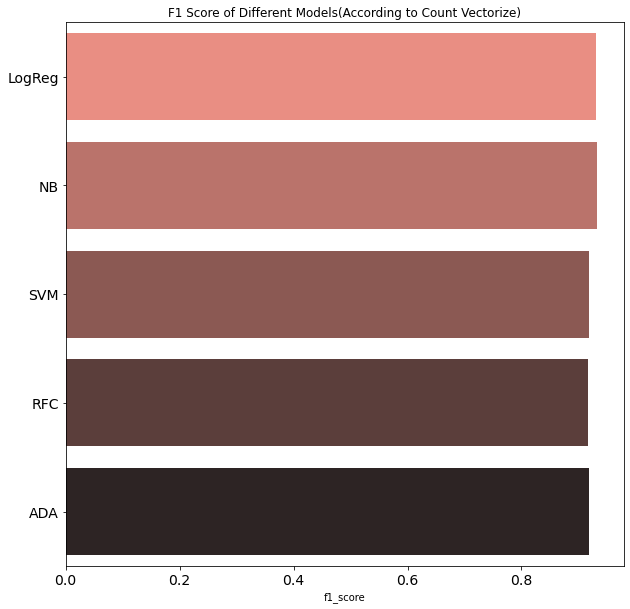

In [194]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x ='f1_score',y = df_count.index,data = df_count,palette ='dark:salmon_r')
plt.yticks(size=14)
plt.xticks(size=14)
plt.title('F1 Score of Different Models(According to Count Vectorize)')

Text(0.5, 1.0, 'Accuracy Score of Different Models(According to Count Vectorize)')

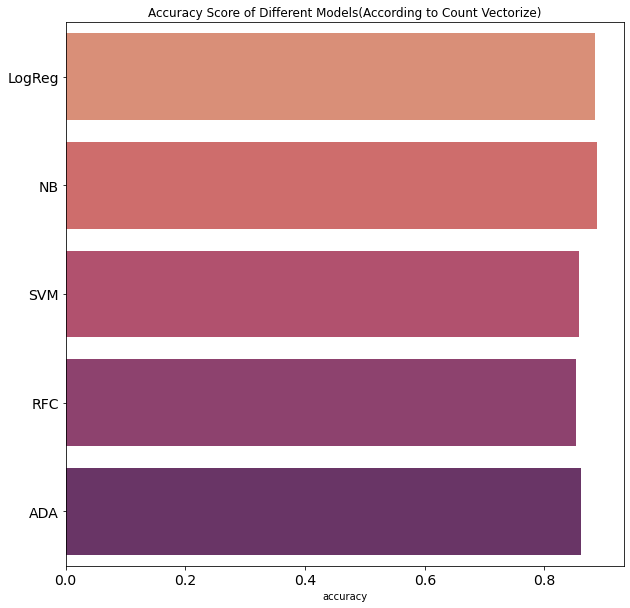

In [192]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x ='accuracy',y = df_count.index,data = df_count,palette ='flare')
plt.yticks(size=14)
plt.xticks(size=14)
plt.title('Accuracy Score of Different Models(According to Count Vectorize)')

Text(0.5, 1.0, 'F1 Score of Different Models(According to TFIDF)')

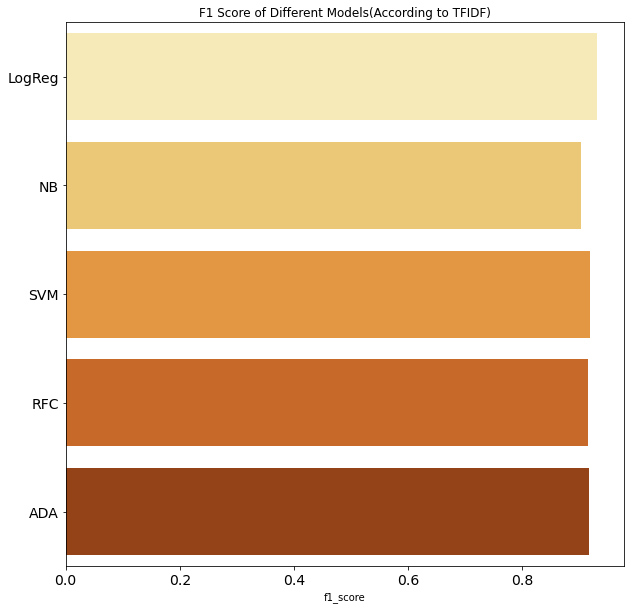

In [196]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x ='f1_score',y = df_tfidf.index,data = df_tfidf,palette ='YlOrBr')
plt.yticks(size=14)
plt.xticks(size=14)
plt.title('F1 Score of Different Models(According to TFIDF)')

Text(0.5, 1.0, 'Accuracy of Different Models(According to TFIDF)')

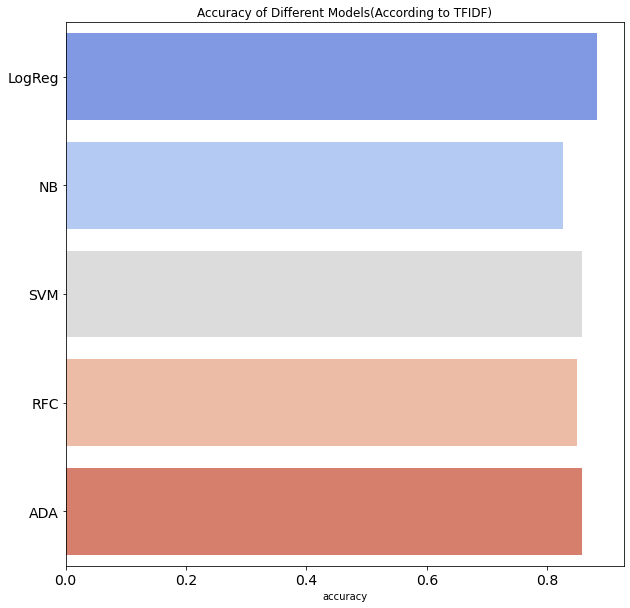

In [199]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x ='accuracy',y = df_tfidf.index,data = df_tfidf,palette ='coolwarm')
#sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
plt.yticks(size=14)
plt.xticks(size=14)
plt.title('Accuracy of Different Models(According to TFIDF)')

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 